## Analysis of Theme Satisfaction and Loyalty at Theme Park Touchpoints

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Using a 7-point Likert Scale, where 1=Strongly Disagree and 7=Strongly Agree

In [6]:
df = pd.read_csv("../data/survey_responses/cleaned_survey_responses.csv")
scale_qns = df.iloc[:, 15:27]
scale_qns.head()

,get_ticket,fee_pricing,queuing,fast_pass_worth,cleanliness,facilities,navigation,rides,theme,relavamce,staffing,friendliness
0,6,4,4,1,7,7,7,6,7,7,7,7
1,7,5,3,2,7,6,7,7,7,6,7,6
2,5,3,3,5,7,5,6,5,5,5,5,6
3,6,1,1,1,6,6,5,3,7,4,4,3
4,6,7,7,4,6,6,6,5,7,4,5,5


In [61]:
summary = scale_qns.describe()
summary.loc[['mean', 'std']] = summary.loc[['mean', 'std']].round(0)
summary

,get_ticket,fee_pricing,queuing,fast_pass_worth,cleanliness,facilities,navigation,rides,theme,relavamce,staffing,friendliness
count,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0
mean,6.0,4.0,3.0,4.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0
std,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0
25%,5.0,2.0,2.0,2.5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
50%,6.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0
75%,7.0,5.0,4.5,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.5
max,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0


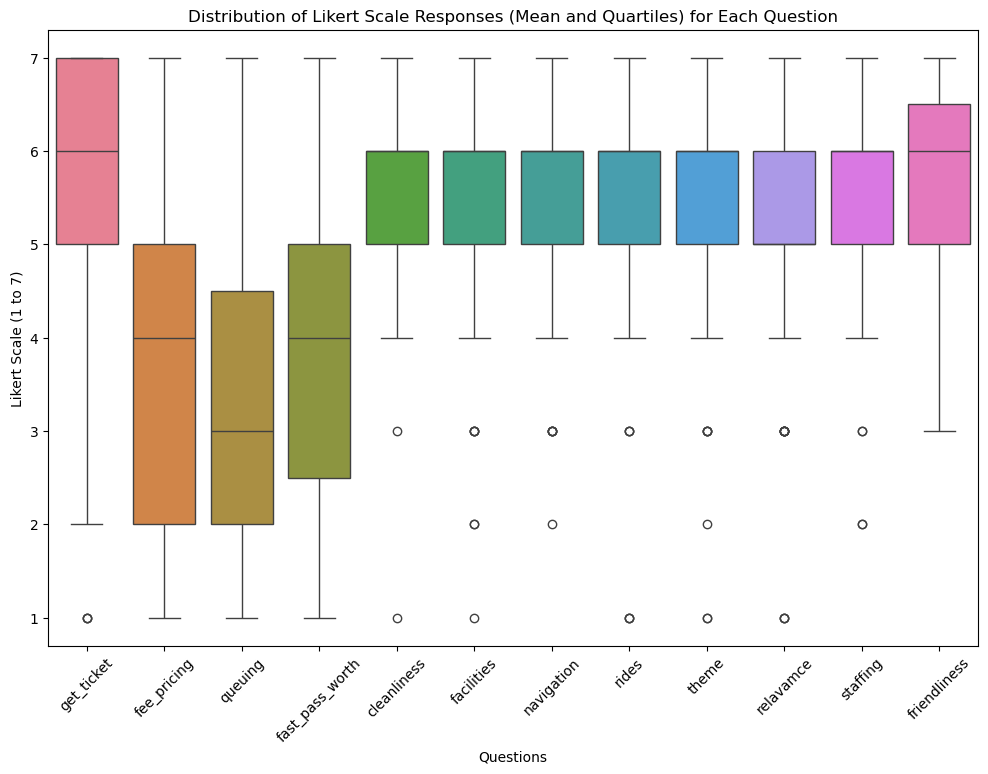

In [9]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=scale_qns)

plt.title("Distribution of Likert Scale Responses (Mean and Quartiles) for Each Question")
plt.xlabel("Questions")
plt.xticks(rotation=45)
plt.ylabel("Likert Scale (1 to 7)")

plt.show()

Looking at a visual representation of the distribution of responses on a 7-point Likert Scale, it is apparent that the distribution for 3 points relating to fee pricing, queue times and express passes have a distribution skewed towards the lower end.

### Net Promoter Score (Measuring Customer Loyalty)
Using a Net Promoter Score Metric, we define: <br>
Detractors (Score of 1-3 included): unlikely to recommend to others, could actively discourage future customers; Unhappy<br>
Passives (Score of 4-5):  tends not to actively promote the brand, but will not damage it either. <br>
Promoters (Score of 6-7): most enthusiastic and loyal customers, likely to act as brand ambassadors; Highly Satisfied


In [62]:
loyalty = df.iloc[:, 27]
nps_question = df.columns[27]

promoters = (loyalty >= 6).sum()
passives = ((loyalty >= 4) & (loyalty <= 5)).sum()
detractors = (loyalty <= 3).sum()

total = loyalty.count()

promoter_pct = (promoters / total) * 100
detractor_pct = (detractors / total) * 100
nps_score = round(promoter_pct - detractor_pct)

print(nps_question)
print(f"NPS Score: {nps_score}")

return_likelihood
NPS Score: 43


### Interpretation of Net Promoter Score (NPS)
NPS Score Range: -100 to 100

Positive NPS → More promoters than detractors → Good customer loyalty<br>
Negative NPS → More detractors than promoters → Needs improvement<br>
0-50 NPS → Neutral<br>
Above 50 → Excellent<br>

<br>
For our survey, we asked one question to test customer loyalty: <br>

26. I am likely to come back to this theme park again
NPS Score: 43

<br>
With a neutral NPS score of 43, it seems that visitors to Universal Studios are unlikely to promote the brand to others.




### Customer Satisfaction Score (CSAT)

For the CSAT, we define: <br>
Satisfied responses = Ratings 5, 6, or 7<br>
Neutral = Rating 4<br>
Dissatisfied = Ratings 1, 2, or 3

In [63]:
scale_qns = scale_qns.apply(pd.to_numeric, errors='coerce')  

satisfied = scale_qns.apply(lambda x: (x >= 5).sum(), axis=0) 

csat_score = (satisfied / total) * 100
csat_score = csat_score.round(0)


print(csat_score)

get_ticket         80.0
fee_pricing        29.0
queuing            25.0
fast_pass_worth    36.0
cleanliness        88.0
facilities         81.0
navigation         81.0
rides              84.0
theme              84.0
relavamce          79.0
staffing           83.0
friendliness       84.0
dtype: float64


### Interpretation of CSAT

The above are expressed as percentages. <br>
For the CSAT, scores from 75%-85% and above are considered "good" and anything below needs improvement.<br>
For the CSAT, we see that 3 touchpoints which have low satisfaction:<br>
Fees were fairly priced (F&B, admission tickets)                                         29.0<br>
I spent less time queueing than expected                                                 25.0 <br>
Getting an express / fast pass is worth it                                               36.0 <br>
<br>

These points relate to wait times/queues, pricing, and the current solution to long wait-times (fastpass). This suggests a disatisfaction with these touchpoints, which could be factors, additionaly, compromising customer loyalty.

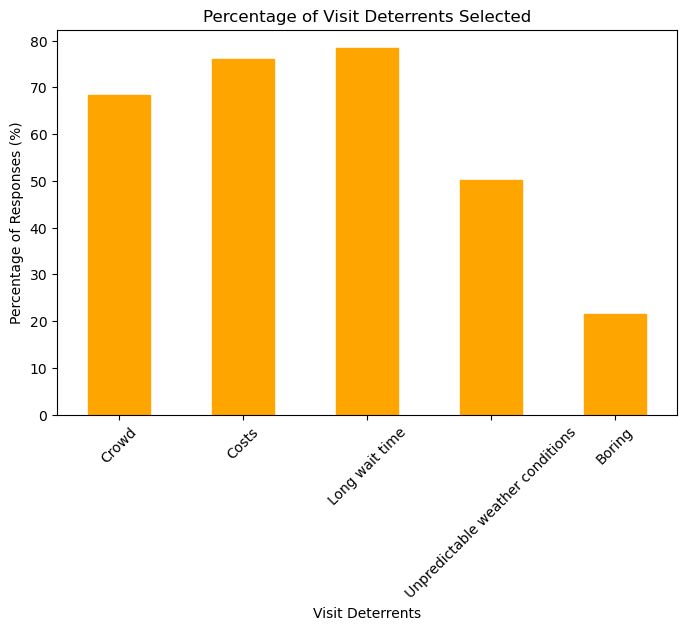

In [76]:
visit_deterrents = df["visit_deterrents"]
deterrent_options = ["Crowd", "Costs", "Long wait time", "Unpredictable weather conditions", "Boring"]

deterrents_count = {option: 0 for option in deterrent_options}

# Count occurrences of each deterrent word
for deterrent in deterrent_options:
    deterrents_count[deterrent] = visit_deterrents.str.contains(deterrent, case=False, na=False).sum()

total_responses = visit_deterrents.count()
deterrents_percentage = {deterrent: (count / total_responses) * 100 for deterrent, count in deterrents_count.items()}

# Convert the dictionary to a Pandas Series for easier plotting
deterrents_percentage_series = pd.Series(deterrents_percentage)

# Plot the bar chart
plt.figure(figsize=(8, 5))
deterrents_percentage_series.plot(kind='bar', color='orange', edgecolor='orange')

# Adding labels and title
plt.xlabel("Visit Deterrents")
plt.ylabel("Percentage of Responses (%)")
plt.title("Percentage of Visit Deterrents Selected")
plt.xticks(rotation=45)
plt.show()

### Analysis of Qualitative Responses

Using qualitative responses of survey respondents answering the question "What dissuades you from wanting to visit a theme park?", we can see from the bar chart that long wait times have the highest percentages. This, along with our CSAT metric that customer disatisfaction with wait times and costs indeed could affect customer loyalty, therefore explaing our low NPS score.

## Overall Insights

The CSAT scores demonstrate to us low satisfaction at 2 main touchpoints, queue times and costs and at the express pass solution. Using the CSAT along with qualitative responses which suggest that deterents to visiting are mainly wait-times/crowds and costs, we see that dissatisfaction at these touchpoints are major areas which can affect customer loyalty.
Indeed, from analysis of the NPS,inicates that Universal Studios Singapore has lower customer loyalty and its visitors are more unlikely to return. 

In order to address these issues, we can explore these solutions:
* Provide better solutions to queue/wait-times like virtual lines to improve customer satisfaction and loyalty, as express passes currently provided are percieved by visitors as "not worth it", suggesting that it is not effective enough for the price it is sold at.
* Enhance Customer Loyalty/Retention through loyalty programs. Indeed, Universal Studios Singapore currently no longer offers seasonal or annual passes.
* Optimize Pricing to change cost perception through bundle deals and loyalty programs.